# Water supply at a municipal level

## SIDRA API

**UN Environment**

In [1]:
import datetime; print(datetime.datetime.now())

2017-08-31 10:52:21.241166


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from API.sidra import getTable

In [4]:
data2 = getTable(indicators=['water', 'urban'], specific=False, cap=7e7)

/home/esteban/Documents/UNEP/Data/Brasil-SIDRA-API/API/DATA/
DU typ	= 44795101	Households	Tab: 1442
HH size	= 4.26*
Urban	= 44795101	Households	Tab: 761
Water	= 56739726	m^3		Tab: 1773
* estimated values


In [5]:
data2.columns = ['water', 'rural', 'urban']

In [6]:
data2.sort_values('water', ascending=False).head()

water         rural         urban
D4C                                           
3134905  6720220.0    868.014940  4.480047e+03
3301207  4800000.0    930.955418  3.163464e+03
3550308  3499924.0  23757.446797  2.619156e+06
2927408  1697644.0    172.146902  6.282124e+05
1504208  1104831.0  11131.774936  4.374598e+04

In [7]:
pop = data2.loc[:, ['rural', 'urban']].sum(axis=1)

In [8]:
data2 = data2.div(pop, axis=0).mul(1000)

In [9]:
data2.loc[:, 'pop'] = pop

In [10]:
data2.sort_values('water', ascending=False).head()

water       rural       urban          pop
D4C                                                       
3134905  1.256571e+06  162.304585  837.695415  5348.061749
3301207  1.172328e+06  227.371802  772.628198  4094.418959
3167509  8.727455e+05  410.327158  589.672842   595.820861
3300951  2.155022e+05   38.875306  961.124694  1921.093672
4309571  1.729719e+05  870.006770  129.993230   693.754365

In [11]:
data2.shape

(5048, 4)

In [12]:
inx = (data2.loc[:,'water'] >= 200000)

In [13]:
data2.loc[inx]

water       rural       urban          pop
D4C                                                       
3134905  1.256571e+06  162.304585  837.695415  5348.061749
3167509  8.727455e+05  410.327158  589.672842   595.820861
3300951  2.155022e+05   38.875306  961.124694  1921.093672
3301207  1.172328e+06  227.371802  772.628198  4094.418959

In [29]:
inx = (data2.loc[:,'water'] <= 6000) #& (data2.loc[:,'urban'] >= 990)
dataP = data2.loc[inx]

In [15]:
dataP = data2

In [30]:
dataP.shape

(5019, 4)

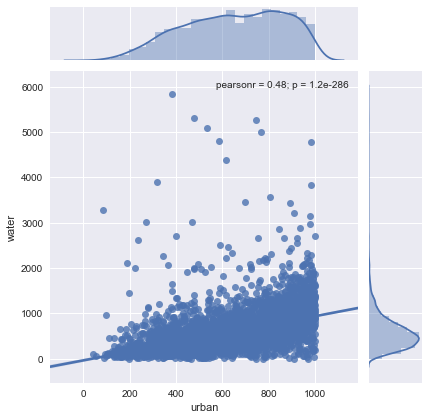

In [31]:
g = sns.jointplot(x='urban', y='water', data=dataP, kind='reg')

In [18]:
import os

In [19]:
data_dir = os.path.join(os.getcwd(), 'API/DATA/')

In [20]:
water = pd.read_csv('{}MUN_water.csv'.format(data_dir), usecols=[0,6], index_col=0, na_values=['-', '...'])

In [21]:
water.columns = ['water']

In [22]:
water = water.loc[water.index != 'Município (Código)']

In [25]:
water.sort_values('water', ascending=False).head()

water
D4C               
3134905  6720220.0
3301207  4800000.0
3550308  3499924.0
3304557  2877120.0
2927408  1697644.0

In [24]:
data2.head()

water       rural       urban          pop
D4C                                                     
1200013  509.410340  528.154411  471.845589  2944.580986
1200054  525.937651  390.645586  609.354414  1426.024545
1200104  994.950749  333.722778  666.277222  5025.374377
1200138  901.763223  564.042026  435.957974  1989.435758
1200179  435.575370  553.421232  446.578768  2066.232534